<a href="https://colab.research.google.com/github/Ayyappa9105/ML_workshop/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EXPLORATORY DATA ANALYSIS (EDA)**bold text**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/students_data_modified.csv')

In [23]:
print("-"*20,"\n Top 5 rows \n","-"*20)
print(df.head())
print("-"*20,"\n total columns name present in it \n","-"*20)
print(df.columns)
print("-"*20,"\n total rows and columns present in it \n","-"*20)
print(df.shape)
print("-"*20,"\n total information present in it \n","-"*20)
print(df.info())
print("-"*20,"\n total null values present in it \n","-"*20)
print(df.isnull().sum())
print("-"*20,"\n total duplicate values present in it \n","-"*20)
print(df.duplicated().sum())
print("-"*20,"\n droping the duplicate values \n","-"*20)
df = df.drop_duplicates()
print("-" * 20, "\n Filling the null values with mean values of the respective branch \n", "-" * 20)
df.loc[:, 'cgpa'] = df.groupby('branch')['cgpa'].transform(lambda x: x.fillna(x.mean()))
print("-" * 20, "\n checking is there any null values \n", "-" * 20)
print(df.isnull().sum())
print("-"*20,"\n droping the null value rows \n","-"*20)
df= df.dropna(subset=['name', 'branch'])
print("-" * 20, "\n coverting cgpa from object to float \n", "-" * 20)
df['cgpa'] = pd.to_numeric(df['cgpa'], errors='coerce')


-------------------- 
 Top 5 rows 
 --------------------
  register_id           name branch  cgpa  gender
0     REG0001   Madhup Kohli    EEE  6.05    Male
1     REG0002  Arnav Chandra    EEE  9.13    Male
2     REG0003    Devansh Lal    EEE  9.65  Female
3     REG0004    Pranay Bera    CSE  6.44  Female
4     REG0005  Zeeshan Amble     ME  8.64    Male
-------------------- 
 total columns name present in it 
 --------------------
Index(['register_id', 'name', 'branch', 'cgpa', 'gender'], dtype='object')
-------------------- 
 total rows and columns present in it 
 --------------------
(1190, 5)
-------------------- 
 total information present in it 
 --------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   register_id  1190 non-null   object 
 1   name         1190 non-null   object 
 2   branch       1190 non-null   object 
 3   cg

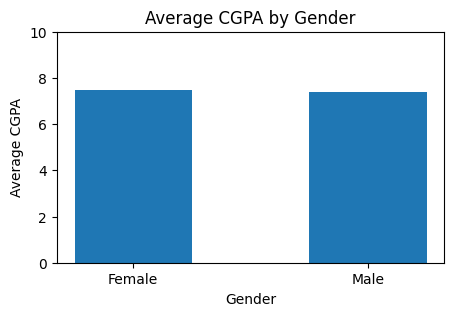

In [45]:
average_cgpa = df.groupby('gender')['cgpa'].mean()
plt.figure(figsize=(5,3))
plt.bar(average_cgpa.index, average_cgpa.values, width=0.5)
plt.title("Average CGPA by Gender")
plt.xlabel("Gender")
plt.ylabel("Average CGPA")
plt.ylim(0, 10)
plt.show()

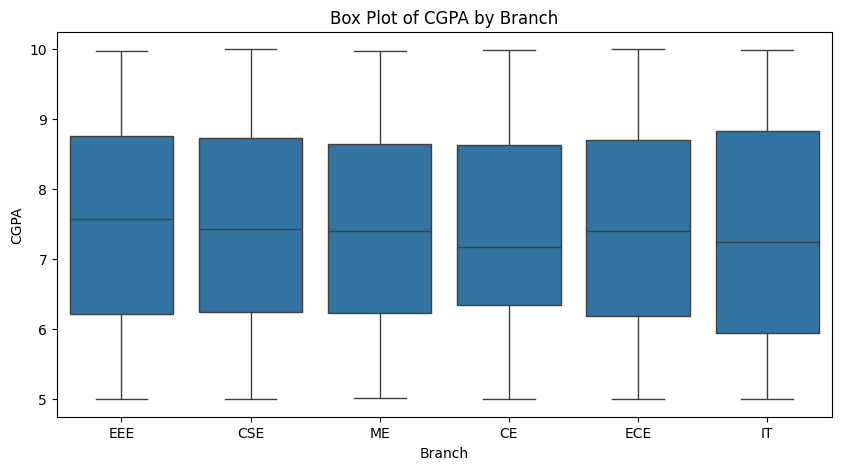

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='branch', y='cgpa')
plt.title("Box Plot of CGPA by Branch")
plt.xlabel("Branch")
plt.ylabel("CGPA")
plt.show()

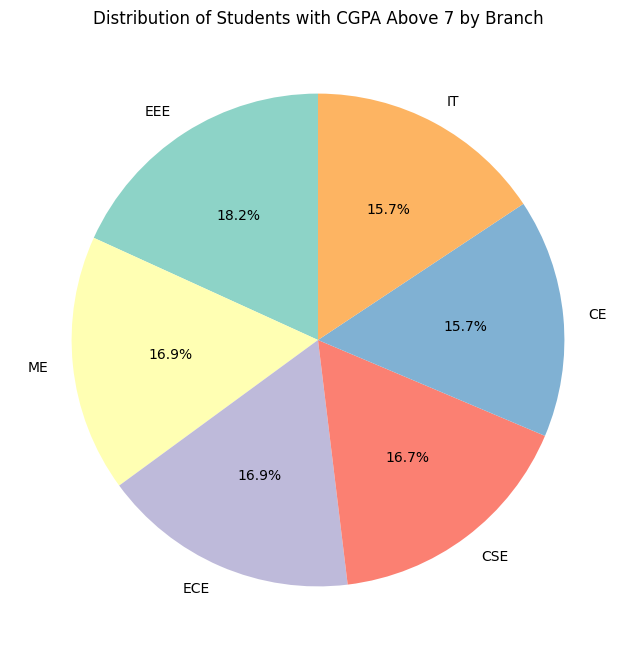

In [49]:
above_7_df = df[df['cgpa'] > 7]
branch_counts_above_7 = above_7_df['branch'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(branch_counts_above_7, labels=branch_counts_above_7.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(branch_counts_above_7)))
plt.title("Distribution of Students with CGPA Above 7 by Branch")
plt.show()